<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<H3 align='center'>  Jorge Portilla / John Rodriguez </H3>

<hr style="height:2px;border:none"/>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras import backend as K
from keras.layers.core import Dense, Activation
import tensorflow as tf
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.callbacks import Callback
%matplotlib inline

Using TensorFlow backend.


In [3]:
import pandas as pd
datos= pd.read_csv("EnergyMolecule/roboBohr.csv")
datos.shape
datos.info()
datos.describe()
print(datos)
...
datos.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total=len(datos)
df_train=datos[:int(0.6*total)]                       #60% de los datos
df_val=datos[int(0.6*total):int(0.85*total)]          #25% de los datos
df_test=datos[int(0.85*total)::]                      #15% restante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB
       Unnamed: 0           0          1          2          3          4  \
0               0   73.516695  17.817765  12.469551  12.458130  12.454607   
1               1   73.516695  20.649126  18.527789  17.891535  17.887995   
2               2   73.516695  17.830377  12.512263  12.404775  12.394493   
3               3   73.516695  17.875810  17.871259  17.862402  17.850920   
4               4   73.516695  17.883818  17.868256  17.864221  17.818540   
5               5   53.358707  17.038820  16.981436  16.167446  16.137631   
6               6   53.358707  17.040919  16.975955  16.168874  16.131888   
7               7   53.358707  15.190748  15.134397  15.078282  13.721467   
8               8   73.516695  20.648642  18.559611  17.674347  16.152675   
9               9   73.516695  17.563342  17.562598  12.65

<a id="segundo"></a>
## 2. Deep Networks
Las *deep network*, o lo que hoy en día se conoce como *deep learning*, hace referencia a modelos de redes neuronales estructurados con muchas capas, es decir, el cómputo de la función final es la composición una gran cantidad de funciones ( $f^{(n)} = f^{(n-1)} \circ f^{(n-2)} \circ \cdots \circ f^{(2)} \circ f^{(1)} $ con $n \gg 0$ ).  
Este tipo de redes neuronales tienen una gran cantidad de parámetros, creciendo exponencialmente por capa con las redes *feed forward*, siendo bastante dificiles de entrenar comparadas con una red poco profunda, esto es debido a que requieren una gran cantidad de datos para ajustar correctamente todos esos parámetros. Pero entonces ¿Cuál es el beneficio que tienen este tipo de redes? ¿Qué ganancias trae el añadir capas a una arquitectura de una red neuronal?  

<img src="http://neuralnetworksanddeeplearning.com/images/tikz36.png" title="Title text" width="80%" height="20%" />



En esta sección se estudiará la complejidad de entrenar redes neuronales profundas, mediante la visualización de los gradientes de los pesos en cada capa, el cómo varía mientras se hace el *backpropagation* hacia las primeras capas de la red. 

> a) Se trabajará con las etiquetas escaladas uniformemente, es decir, $\mu=0$ y $\sigma=1$, ajuste sobre el conjunto de entrenamiento y transforme éstas además de las de validación y pruebas.


In [4]:
scaler = StandardScaler().fit(df_train)
#Transform training
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = X_train_scaled.pop('Eat').values.reshape(-1,1)
#Transform val
X_val_scaled = pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
y_val_scaled = X_val_scaled.pop('Eat').values.reshape(-1,1)
#Transform test
X_Test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_Test_scaled = X_Test_scaled.pop('Eat').values.reshape(-1,1)

y_train = df_train.pop('Eat').values.reshape(-1,1)
y_val = df_val.pop('Eat').values.reshape(-1,1)


In [5]:
model2 = Sequential()
model2.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model2.compile(optimizer=sgd,loss='mean_squared_error')
history2 = model2.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 444us/step - loss: 1.4365 - val_loss: 0.5244
Epoch 2/250
9745/9745 [==============================] - 4s 408us/step - loss: 0.6070 - val_loss: 0.4590
Epoch 3/250
9745/9745 [==============================] - 4s 443us/step - loss: 0.4867 - val_loss: 0.3586
Epoch 4/250
9745/9745 [==============================] - 4s 372us/step - loss: 0.4118 - val_loss: 0.3237
Epoch 5/250
9745/9745 [==============================] - 4s 384us/step - loss: 0.3563 - val_loss: 0.2786
Epoch 6/250
9745/9745 [==============================] - 4s 382us/step - loss: 0.3105 - val_loss: 0.3024
Epoch 7/250
9745/9745 [==============================] - 5s 476us/step - loss: 0.2740 - val_loss: 0.2355
Epoch 8/250
9745/9745 [==============================] - 5s 486us/step - loss: 0.2438 - val_loss: 0.2334
Epoch 9/250
9745/9745 [==============================] - 5s 501us/step - loss: 0.2178 - val_loss: 0.2190
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 4s 446us/step - loss: 0.0305 - val_loss: 0.0509
Epoch 79/250
9745/9745 [==============================] - 4s 432us/step - loss: 0.0294 - val_loss: 0.0477
Epoch 80/250
9745/9745 [==============================] - 3s 348us/step - loss: 0.0303 - val_loss: 0.0507
Epoch 81/250
9745/9745 [==============================] - 4s 402us/step - loss: 0.0294 - val_loss: 0.0498
Epoch 82/250
9745/9745 [==============================] - 4s 386us/step - loss: 0.0281 - val_loss: 0.0469
Epoch 83/250
9745/9745 [==============================] - 3s 295us/step - loss: 0.0282 - val_loss: 0.0500
Epoch 84/250
9745/9745 [==============================] - 3s 348us/step - loss: 0.0286 - val_loss: 0.0528
Epoch 85/250
9745/9745 [==============================] - 3s 347us/step - loss: 0.0302 - val_loss: 0.0455
Epoch 86/250
9745/9745 [==============================] - 4s 448us/step - loss: 0.0284 - val_loss: 0.0482
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 5s 492us/step - loss: 0.0202 - val_loss: 0.0433
Epoch 156/250
9745/9745 [==============================] - 4s 459us/step - loss: 0.0185 - val_loss: 0.0469
Epoch 157/250
9745/9745 [==============================] - 4s 398us/step - loss: 0.0196 - val_loss: 0.0512
Epoch 158/250
9745/9745 [==============================] - 3s 342us/step - loss: 0.0200 - val_loss: 0.0401
Epoch 159/250
9745/9745 [==============================] - 4s 361us/step - loss: 0.0188 - val_loss: 0.0405
Epoch 160/250
9745/9745 [==============================] - 4s 440us/step - loss: 0.0191 - val_loss: 0.0394
Epoch 161/250
9745/9745 [==============================] - 4s 396us/step - loss: 0.0187 - val_loss: 0.0422
Epoch 162/250
9745/9745 [==============================] - 4s 428us/step - loss: 0.0195 - val_loss: 0.0451
Epoch 163/250
9745/9745 [==============================] - 5s 490us/step - loss: 0.0189 - val_loss: 0.0416
Epoch 164/250
9745/9745 [============

9745/9745 [==============================] - 3s 358us/step - loss: 0.0159 - val_loss: 0.0396
Epoch 232/250
9745/9745 [==============================] - 4s 365us/step - loss: 0.0148 - val_loss: 0.0413
Epoch 233/250
9745/9745 [==============================] - 4s 453us/step - loss: 0.0150 - val_loss: 0.0492
Epoch 234/250
9745/9745 [==============================] - 4s 434us/step - loss: 0.0147 - val_loss: 0.0381
Epoch 235/250
9745/9745 [==============================] - 4s 410us/step - loss: 0.0148 - val_loss: 0.0435
Epoch 236/250
9745/9745 [==============================] - 4s 404us/step - loss: 0.0154 - val_loss: 0.0382
Epoch 237/250
9745/9745 [==============================] - 4s 425us/step - loss: 0.0147 - val_loss: 0.0377
Epoch 238/250
9745/9745 [==============================] - 4s 425us/step - loss: 0.0153 - val_loss: 0.0405
Epoch 239/250
9745/9745 [==============================] - 4s 432us/step - loss: 0.0146 - val_loss: 0.0475
Epoch 240/250
9745/9745 [==========================

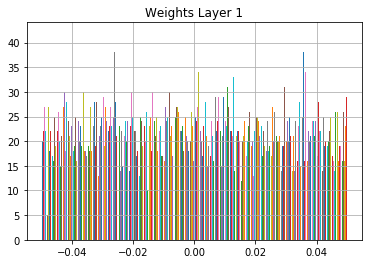

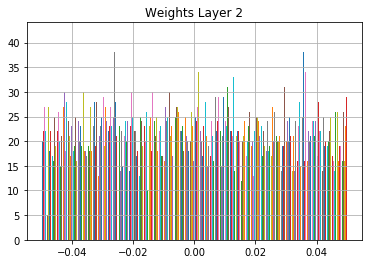

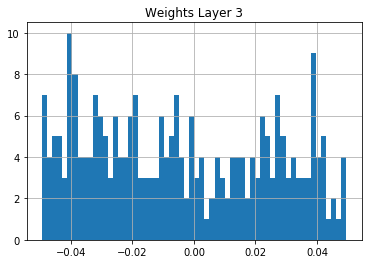

<Figure size 432x288 with 0 Axes>

In [6]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
#history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

###calculate gradients

#funcion de perdida 
import keras
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model.layers[0].output,y_train_scaled)#el gradiente de la funcion de perdida
listOfVariableTensors = model.layers[0].trainable_weights
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

#model.layers[0].Weight.get_value()
#weights0 = model.layers[0].get_weights()[0] 
#biases0 = model.layers[0].get_weights()[1] 
#weights1 = model.layers[1].get_weights()[0] 
#biases1 = model.layers[1].get_weights()[1] 
#layer0 = K.function([model.layers[0].input],[model.layers[-1].output]) 
#layer1 = K.function([model.layers[0].input],[model.layers[1].output]) 

f=tf.keras.backend.gradients(
    loss,
    listOfVariableTensors
)
weights0, biases0 = model.layers[-2].get_weights()
weights, biases = model.layers[0].get_weights()
weights1, biases1 = model.layers[1].get_weights()

#print (weights0)
#print(len(model.layers))
#g=tf.convert_to_tensor(gradients)
#
#tf.summary.histogram("sample1",g,collections=None,family=None)
plt.title('Weights Layer 1')
plt.hist(weights0, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

plt.title('Weights Layer 2')
plt.hist(weights, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

plt.title('Weights Layer 3')
plt.hist(weights1, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

> b) Para el mismo problema definido anteriormente ([sección 1](#primero)) se entrenarán diferentes redes. En esta primera instancia se trabajará con la misma red de la pregunta b), inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (*loss*) para el conjunto de entrenamiento (promedio del gradiente de cada dato) respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de *gradients* (__[link](https://www.tensorflow.org/api_docs/python/tf/keras/backend/gradients)__) en el *backend* de Keras. Deberá generar un **histograma** para todos los pesos de cada capa antes y despues del entrenamiento con 250 *epochs*. Comente.